# Importing packages

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from typing import List
import xarray as xr
import seaborn as sns

# Run line by line and debug
You can also view active variables at any time. If you are unsure about a function, you can peek it.

In [27]:
lonlat = xr.open_mfdataset(["/ocean/projects/atm200007p/jlin96/longSPrun/AndKua_aqua_Base_training.cam2.h1.0001-01-19-00000.nc", \
                            "/ocean/projects/atm200007p/jlin96/longSPrun/AndKua_aqua_Base_training.cam2.h1.0001-01-20-00000.nc"])

def createPressureGrid(h1Data):
    hyam = np.array(h1Data["hyam"])
    hybm = np.array(h1Data["hybm"])
    ps = np.array(h1Data["NNPS"])
    lats = np.array(h1Data["lat"])
    lons = np.array(h1Data["lon"])
    levs = 30
    times = np.array(range(len(ps)))
    pressureGrid = np.zeros([len(times), 30, len(lats), len(lons)])
    for t in range(len(times)):
        for lat in range(len(lats)):
            for lon in range(len(lons)):
                pressureGrid[t, :, lat, lon]  = hyam[t]*1e5 + ps[t][lat][lon]*hybm[t]
    return np.diff(pressureGrid, axis = 1)
pressures = np.mean(createPressureGrid(lonlat), axis = 0)[11:29,np.newaxis,:,:]
mass_weights = pressures/sum(pressures.flatten())

# Manipulating cells
I'll cover moving, changing, hiding, splitting, outline, and grouping here.

In [8]:
output_path = "/ocean/projects/atm200007p/jlin96/CS274E_datasets/model_output_expanded/trace/"

with open(output_path + "alternate_trace_4.npy", 'rb') as f:
    alternate_trace = np.load(f)

with open(output_path + "alternate_trace_8.npy", 'rb') as f:
    alternate_trace = np.load(f)


In [ ]:
### showing the benefits of vscode jupyter cell manipulation

Text(0, 0.5, 'count')

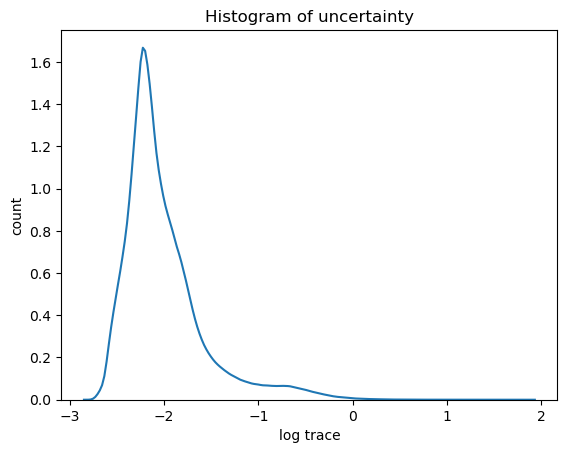

In [11]:
flattrace = np.log10(sorted(alternate_trace.flatten()))
sns.kdeplot(flattrace)
plt.title("Histogram of uncertainty")
plt.xlabel("log trace")
plt.ylabel("count")

# Showing off Github CoPilot

In [16]:
with open(output_path + "alternate_trace_4.npy", 'rb') as f:
    alternate_trace_4 = np.load(f)

with open(output_path + "alternate_trace_8.npy", 'rb') as f:
    alternate_trace_8 = np.load(f)

flattrace_4 = np.log10(sorted(alternate_trace_4.flatten()))
flattrace_8 = np.log10(sorted(alternate_trace_8.flatten()))

In [21]:
# find median of two sorted arrays
class Solution:
    def findMedianSortedArrays(self, nums1: List[int], nums2: List[int]) -> float:
        nums = nums1 + nums2
        nums.sort()
        if len(nums) % 2 == 0:
            return (nums[len(nums)//2] + nums[len(nums)//2 - 1])/2
        else:
            return nums[len(nums)//2]

In [ ]:
# Rotate image by 90 degrees clockwise
class Solution:
    def rotate(self, matrix: List[List[int]]) -> None:
        """
        Do not return anything, modify matrix in-place instead.
        """
        matrix[:] = zip(*matrix[::-1]) # type: ignore